#### Customer segmentation RFM analysis

#### Load the required libraries and read data from Online retail excel file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [ ]:
Retail_df = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
Retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Convert the series invoice date data in datetime format and count the unique number of attributes

In [ ]:
Retail_df['Date']= pd.to_datetime(Retail_df['InvoiceDate'],format='%y-%m-%d %H:%M:%S')


def unique_counts(Retail_df):
  for i in Retail_df.columns:
    count=Retail_df[i].nunique()
    print(i,":",count)


In [ ]:
unique_counts(Retail_df)

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38
Date : 23260


In [ ]:
Retail_df['Total Price'] = Retail_df['Quantity']*Retail_df['UnitPrice']

In [ ]:
Retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60


#### Only consider rows without NaN values and store the data in dataset Online_retail_df

In [ ]:
online_retail_df= Retail_df[np.isfinite(Retail_df['CustomerID'])]
online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60


#### Count the unique no of attributes in Retail data

In [ ]:
unique_counts(online_retail_df)

InvoiceNo : 22190
StockCode : 3684
Description : 3896
Quantity : 436
InvoiceDate : 20460
UnitPrice : 620
CustomerID : 4372
Country : 37
Date : 20460
Total Price : 4041


#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df

In [ ]:
final_retail= online_retail_df[online_retail_df['Quantity']>0]
final_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60


In [ ]:
final_retail.shape

(397924, 10)

In [ ]:
unique_counts(final_retail)

InvoiceNo : 18536
StockCode : 3665
Description : 3877
Quantity : 302
InvoiceDate : 17286
UnitPrice : 441
CustomerID : 4339
Country : 37
Date : 17286
Total Price : 2940


In [ ]:
final_retail['Date'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
type(final_retail['Date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
final_retail['Date'].min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
final_retail.to_csv("transaction.csv")

### Q5.a ) Calculate RFM value of each customer
#### Assumption: In this final dataset , I have removed all the transaction with negative quantity value

In [ ]:
#calculate resency and frequency
import datetime as dt
NOW=dt.datetime(2011,12,10)
NOW

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
final_retail.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


In [ ]:
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda y: (NOW-y.max()).days,'InvoiceDate': lambda x: len(x), 'Total Price': lambda x: x.sum() })
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date':'Recency',
                         'InvoiceDate':'Frequency',
                         'Total Price':'Monetary_Value'},inplace=True)

In [ ]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.to_csv("RFM_data.csv")
rfmTable.shape


(4339, 3)

In [ ]:
rfmTable

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [ ]:
DF_RFM = pd.read_csv('/content/RFM_data.csv',encoding = 'utf-8')
DF_RFM

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,756,2094.88


In [ ]:

DF_RFM['recency_normalized']=pd.qcut(DF_RFM['Recency'],50,labels=False)
DF_RFM['recency_normalized']=DF_RFM['recency_normalized']+1
DF_RFM['frequency_normalized']=pd.qcut(DF_RFM['Frequency'],50,labels=False)
DF_RFM['frequency_normalized']=DF_RFM['frequency_normalized']+1
DF_RFM['monetary_value_normalized']=pd.qcut(DF_RFM['Monetary_Value'],50,labels=False)
DF_RFM['monetary_value_normalized']=DF_RFM['monetary_value_normalized']+1

In [ ]:
DF_RFM
DF_RFM.to_csv("RFM_data_normalized.csv")

In [ ]:
from sklearn import preprocessing

DF_ARRAY = np.array(DF_RFM.iloc[:,4:8])# Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data
DF_ARRAY 

array([[49,  1, 50],
       [ 2, 45, 47],
       [31, 21, 39],
       ...,
       [ 6,  9,  7],
       [ 3, 50, 41],
       [23, 33, 39]])

In [ ]:
DF_NORM

array([[0.69985719, 0.0142828 , 0.71413999],
       [0.030722  , 0.69124506, 0.72196706],
       [0.57338627, 0.38842295, 0.72135692],
       ...,
       [0.46569032, 0.69853547, 0.54330537],
       [0.04634621, 0.77243687, 0.63339823],
       [0.41051798, 0.58900405, 0.6960957 ]])

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(DF_NORM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

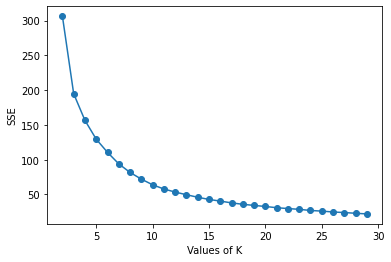

In [ ]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 30)


# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 15)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
DF_RFM['cluster'] = kmeans.labels_
DF_RFM

,CustomerID,Recency,Frequency,Monetary_Value,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
0,12346.0,325,1,77183.60,49,1,50,10
1,12347.0,2,182,4310.00,2,45,47,5
2,12348.0,75,31,1797.24,31,21,39,10
3,12349.0,18,73,1757.55,13,34,39,0
4,12350.0,310,17,334.40,48,13,15,3
...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,46,7,7,8
4335,18281.0,180,7,80.82,41,5,2,8
4336,18282.0,7,12,178.05,6,9,7,9
4337,18283.0,3,756,2094.88,3,50,41,5


In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()
    
PLOT.add_trace(go.Scatter3d(x = DF_RFM['recency_normalized'],
                            y = DF_RFM['frequency_normalized'],
                            z = DF_RFM['monetary_value_normalized']
                           )
              )

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(DF_RFM.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = DF_RFM[DF_RFM.cluster == C]['recency_normalized'],
                                y = DF_RFM[DF_RFM.cluster == C]['frequency_normalized'],
                                z = DF_RFM[DF_RFM.cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'RFM Segment ' + str(C)))

In [ ]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))